In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/final/Life-Expectancy-Data-Updated_수정11.csv')

In [ ]:
df['Log_Hepatitis_B'] = np.log1p(df['Hepatitis_B'])
df['Log_Polio'] = np.log1p(df['Polio'])
df['Log_Diphtheria'] = np.log1p(df['Diphtheria'])

In [ ]:
df['Log_Hepatitis_B'] = df['Log_Hepatitis_B'].fillna(df['Log_Hepatitis_B'].mean())
df['Log_Polio'] = df['Log_Polio'].fillna(df['Log_Polio'].mean())
df['Log_Diphtheria'] = df['Log_Diphtheria'].fillna(df['Log_Diphtheria'].mean())

In [ ]:
df['V'] = df[['Log_Hepatitis_B', 'Log_Polio', 'Log_Diphtheria']].mean(axis=1)


In [ ]:
from sklearn.model_selection import train_test_split

X = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Life_expectancy'])
Y = df['Life_expectancy']

X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
# X_train과 Y_train 훈련에 사용될 데이터 2016개 X(train,test)특성 29개
# X_test과 Y_test 훈련에 사용할 데이터 864개

(2016, 24)
(864, 24)
(2016,)
(864,)


In [ ]:
print(X.columns)

Index(['Year', 'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption',
       'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'infant', 'Log_GDP_per_capita',
       'Population_mln_log', 'Adult_mortality_log', 'Log_Hepatitis_B',
       'Log_Polio', 'Log_Diphtheria', 'V'],
      dtype='object')


In [ ]:
print(df.columns)

Index(['Country', 'Region', 'Year', 'Under_five_deaths', 'Adult_mortality',
       'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio',
       'Diphtheria', 'Incidents_HIV', 'Population_mln',
       'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling',
       'Economy_status_Developed', 'Economy_status_Developing',
       'Life_expectancy', 'infant', 'Log_GDP_per_capita', 'BMI_group',
       'Population_mln_log', 'Adult_mortality_log', 'Log_Hepatitis_B',
       'Log_Polio', 'Log_Diphtheria', 'V'],
      dtype='object')


In [ ]:
#  Logistic Regression 표준화, 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
print(X.dtypes)

Year                             int64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
infant                         float64
Log_GDP_per_capita             float64
Population_mln_log             float64
Adult_mortality_log            float64
Log_Hepatitis_B                float64
Log_Polio                      float64
Log_Diphtheria                 float64
V                              float64
dtype: object


In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train_sc,Y_train)

LinearRegression()

In [ ]:
from sklearn import metrics

Y_pred_train = LR.predict(X_train_sc)
Y_pred_test = LR.predict(X_test_sc)

print(metrics.r2_score(Y_train, Y_pred_train))
print(metrics.r2_score(Y_test, Y_pred_test))
#Train R2 98.42프로
#Test R2 98.02프로
# 성능 좋음

0.9842230400377329
0.9802841243766691


In [ ]:
#과적합 방지
from sklearn import metrics
import numpy as np

print("[Train]")
print('MAE:', metrics.mean_absolute_error(Y_train, Y_pred_train))
print('MSE:', metrics.mean_squared_error(Y_train, Y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train)))
print('------------------------------------------')
print("[Test]")
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred_test))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test)))

#Train
#MAE :예측값과 실제값의 차이을 절대값으로 평균 0.93년 오차
#MSE: 오차를 제곱해서 평균 1.43
#RMSE: MSE에 루트를 씌운 값 1.19년 평균 오차

#Test
#MAE: 0.98년 오차
#MSE: 학습데이터보다 크다 1.65
#RMSE: 1.29년의 오차
#과적합 없이 안정적인 성능


[Train]
MAE: 0.9392527608182957
MSE: 1.4310686285825684
RMSE: 1.1962728069226385
------------------------------------------
[Test]
MAE: 0.9756834870624578
MSE: 1.6493176235388585
RMSE: 1.2842576157215726


In [ ]:
df_c = pd.DataFrame(columns = ['model', 'r2_train', 'r2_test', 'RMSE_train', 'RMSE_test'])
df_c.columns = ['model', 'r2_train', 'r2_test', 'RMSE_train', 'RMSE_test']
df_c

,model,r2_train,r2_test,RMSE_train,RMSE_test


In [ ]:
import sklearn.metrics as metrics

ab = pd.DataFrame({ 'model' : ['LR'],
                      'r2_train' :  metrics.r2_score(Y_train,Y_pred_train),
                      'r2_test' : metrics.r2_score(Y_test,Y_pred_test),
                      'RMSE_train' : np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train)),
                      'RMSE_test' : np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test)),}
                    )

df_c = pd.concat([df_c, ab], ignore_index=True)

print(df_c)
#r2_train 98.4프로
#r2_test_ 98.03프로
#RMSE_train 1.19 예측값과 실제값 차이 남
#Rmse_test 1.28 예측값과 실제값 사이 평균 오차
#성능 좋음
#LR 모델의 성능을 평가, 모델의 예측 정확도와 안정성을 확인, 모델들과 비교, 개선 방향

  model  r2_train   r2_test  RMSE_train  RMSE_test
0    LR  0.984223  0.980284    1.196273   1.284258


<ipython-input-110-fa33d31f1722>:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_c = pd.concat([df_c, ab], ignore_index=True)


<ipython-input-111-b9dcfd807f0a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='r2_test', data=df_c, palette='viridis') # viridis 색상 그라데이션
<ipython-input-111-b9dcfd807f0a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='RMSE_test', data=df_c, palette='magma') #magma 색상변화


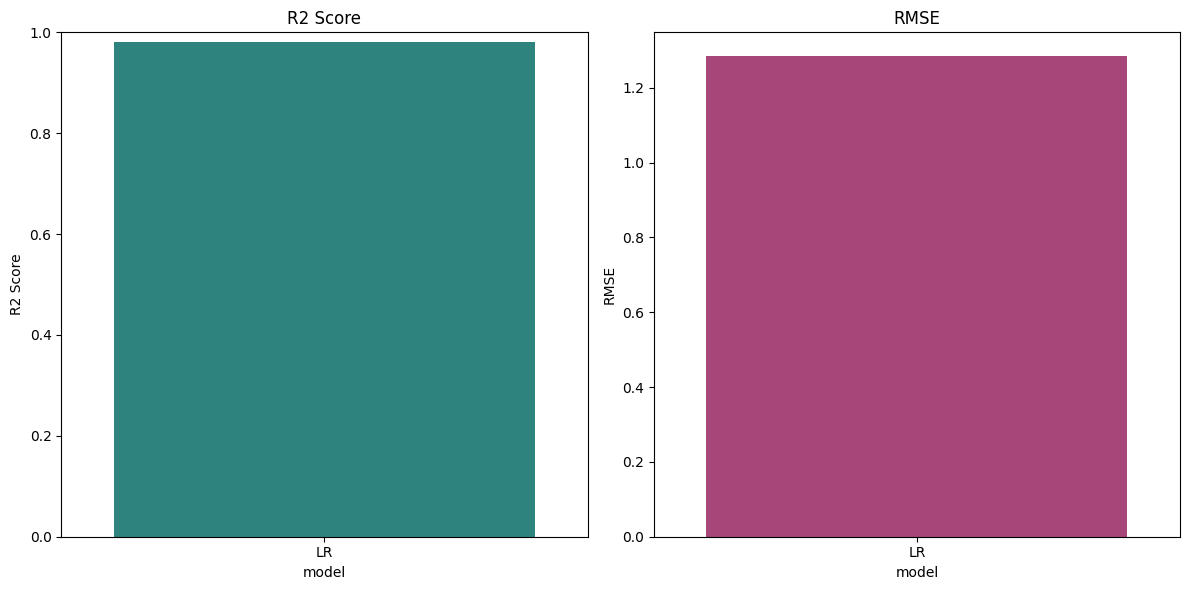

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# R2 score 비교
plt.subplot(1, 2, 1)
sns.barplot(x='model', y='r2_test', data=df_c, palette='viridis')
plt.title('R2 Score')
plt.ylim(0, 1)
plt.ylabel('R2 Score')

# RMSE 비교
plt.subplot(1, 2, 2)
sns.barplot(x='model', y='RMSE_test', data=df_c, palette='magma')
plt.title('RMSE')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()
#r2 높을수록 좋음 분산 중 90프로 이상 설명
#RMSE 낮을수록 좋음 기대수명 평균 1.3년 차이
# 둘다 좋은 성능

랜덤 포레스트

In [ ]:
#  RandomForest
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rfc = RandomForestRegressor()
rfc.fit(X_train, Y_train)

Y_pred_train = rfc.predict(X_train)
Y_pred_test = rfc.predict(X_test)

print(metrics.r2_score(Y_train, Y_pred_train))
print(metrics.r2_score(Y_test, Y_pred_test))
# 성능 좋음
#과적합 방지, R2 값을 통해 모델이 훈련 데이터와 새로운 데이터에서 잘 일반화되었는지 평가

0.999440585383305
0.9953110870954294


<ipython-input-113-181f6b6cf768>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Train', 'Test'], y=[rf['r2_train'][0], rf['r2_test'][0]], palette='coolwarm')


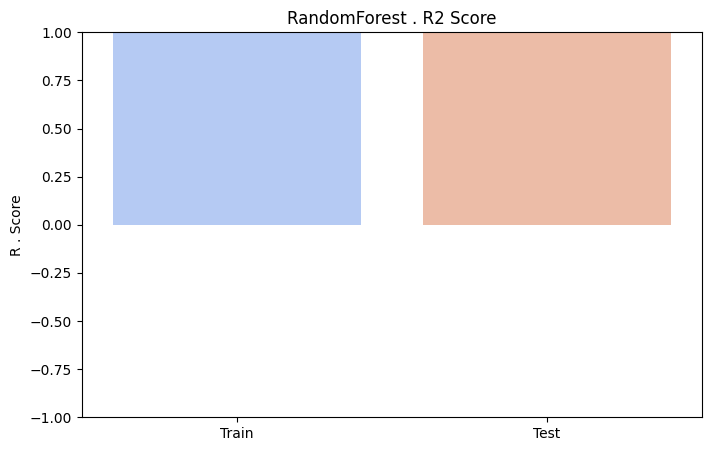

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# RandomForest
rf = pd.DataFrame({
    'model': ['RandomForest'],
    'r2_train': [metrics.r2_score(Y_train, Y_pred_train)],
    'r2_test': [metrics.r2_score(Y_test, Y_pred_test)]
})

plt.figure(figsize=(8, 5))

# R2 Score 시각화
sns.barplot(x=['Train', 'Test'], y=[rf['r2_train'][0], rf['r2_test'][0]], palette='coolwarm')
plt.ylim(-1, 1)
plt.title('RandomForest . R2 Score')
plt.ylabel('R . Score')
plt.show()

#매우 좋음

In [ ]:
#성능 지표
print("[Train]")
print('MAE:', metrics.mean_absolute_error(Y_train, Y_pred_train))
print('MSE:', metrics.mean_squared_error(Y_train, Y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train)))
print('------------------------------------------')
print("[Test]")
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred_test))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test)))
#Train
#MAE: 실제값과 예측값 차이 절대값으로 평균한 값 0.16년 차이
#MSE: 오차 제곱 평균 0.05 낮을수록 예측 성능 좋음
#RMSE: 0.23년 차이

#Test
#MAE: 0.42년 차이 1년 정도 차이 예측 정확도 떨어짐
#MSE: 0.386 예측값과 실제값 차이 제곱하여 평균 낸 값 양호함
#RMSE: 0.62년 차이

[Train]
MAE: 0.15852132936507912
MSE: 0.05074239335317511
RMSE: 0.22526072305924774
------------------------------------------
[Test]
MAE: 0.4192604166666666
MSE: 0.39224769097222356
RMSE: 0.6262968074102115


In [ ]:
#  BayesianOptimization 설치
!pip install bayesian-optimization

In [ ]:
#베이지안 최적화
from bayes_opt import BayesianOptimization
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

def model_e(n_estimators, maxDepth):
    model = RandomForestRegressor(
        n_estimators=int(n_estimators),
        max_depth=int(maxDepth),
        random_state=1121
    )
    score = cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')
    return np.mean(score)

optimizer = BayesianOptimization(
    f=model_e,
    pbounds={'n_estimators': (100, 300), 'maxDepth': (2, 6)},
    random_state=1121
)

optimizer.maximize(init_points=5, n_iter=10)

print(optimizer.max)

#모델 성능 최적화: 하이퍼파라미터(n_estimators, max_depth) 최적화로 모델 예측 성능 최대화.
#효율적인 탐색: 베이지안 최적화로 빠르고 효율적으로 최적 파라미터 탐색
#교차 검증 활용: 교차 검증으로 모델의 일반화 성능 평가, 과적합 방지
#성능 향상: 하이퍼파라미터 튜닝으로 모델 성능을 최대로 끌어올림

|   iter    |  target   | maxDepth  | n_esti... |
-------------------------------------------------
| 1         | 0.9475    | 3.886     | 209.5     |
| 2         | 0.9728    | 4.081     | 114.0     |
| 3         | 0.8967    | 2.042     | 154.1     |
| 4         | 0.9476    | 3.629     | 248.6     |
| 5         | 0.9831    | 5.849     | 261.0     |
| 6         | 0.9831    | 5.232     | 260.8     |
| 7         | 0.8962    | 2.136     | 278.7     |
| 8         | 0.9727    | 4.502     | 100.2     |
| 9         | 0.983     | 5.913     | 127.6     |
| 10        | 0.983     | 5.975     | 186.4     |
| 11        | 0.8964    | 2.119     | 176.4     |
| 12        | 0.983     | 5.722     | 194.5     |
| 13        | 0.9831    | 5.91      | 228.5     |
| 14        | 0.8966    | 2.033     | 135.7     |
| 15        | 0.983     | 5.857     | 121.4     |
{'target': np.float64(0.9831047225658558), 'params': {'maxDepth': np.float64(5.232380083744555), 'n_estimators': np.float64(260.79465518611966)}}


In [ ]:
#  RandomForest
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
import numpy as np

r = RandomForestRegressor(n_estimators=261, max_depth = 6, random_state= 1121)
r.fit(X_train, Y_train)

Y_pred_train = r.predict(X_train)
Y_pred_test = r.predict(X_test)


rfc = pd.DataFrame({ 'model' : ['RFC(BO)'],
                      'r2_train' :  metrics.r2_score(Y_train,Y_pred_train),
                      'r2_test' : metrics.r2_score(Y_test,Y_pred_test),
                      'RMSE_train' : np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train)),
                      'RMSE_test' : np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test)),}
                    )

df_c = pd.concat([df_c, rfc], ignore_index=True)
df_c.reset_index(drop=True, inplace = True)
print(df_c)
#훈련r2
#RFC(BO)가 훈련 테스트에서 더 높은 설명력 보임

     model  r2_train   r2_test  RMSE_train  RMSE_test
0       LR  0.984223  0.980284    1.196273   1.284258
1  RFC(BO)  0.992240  0.987241    0.838955   1.033128


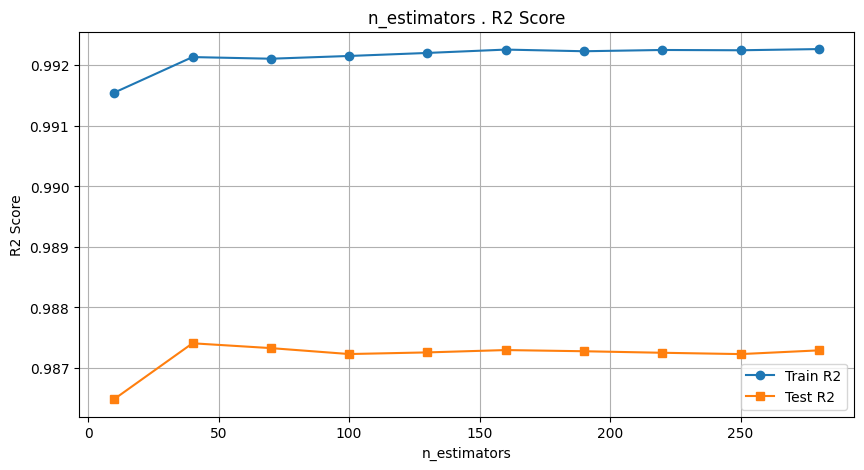

 가장 일반화 잘 된 모델:
n_estimators: 40
Train R2: 0.9921
Test R2: 0.9874
차이: 0.0047


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

n_values = range(10, 301, 30)

r2_train_scores = []
r2_test_scores = []

for n in n_values:
    model = RandomForestRegressor(n_estimators=n, max_depth=6, random_state=1121)
    model.fit(X_train, Y_train)

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    r2_train_scores.append(r2_score(Y_train, pred_train))
    r2_test_scores.append(r2_score(Y_test, pred_test))

plt.figure(figsize=(10, 5))
plt.plot(n_values, r2_train_scores, label='Train R2', marker='o')
plt.plot(n_values, r2_test_scores, label='Test R2', marker='s')
plt.title('n_estimators . R2 Score')
plt.xlabel('n_estimators')
plt.ylabel('R2 Score')
plt.legend()
plt.grid(True)
plt.show()

# R2 차이 계산
r2_diff = [abs(tr - te) for tr, te in zip(r2_train_scores, r2_test_scores)]

# 가장 차이 작은 인덱스 찾기
best_idx = r2_diff.index(min(r2_diff))

print(" 가장 일반화 잘 된 모델:")
print(f"n_estimators: {n_values[best_idx]}")
print(f"Train R2: {r2_train_scores[best_idx]:.4f}")
print(f"Test R2: {r2_test_scores[best_idx]:.4f}")
print(f"차이: {r2_diff[best_idx]:.4f}")
#성능 최고

xg

In [ ]:
# XGBoost
from xgboost import XGBRegressor

XGB = XGBRegressor()
XGB.fit(X_train, Y_train)

**lightGBM**

In [ ]:
# lightGBM
import lightgbm as lgbm
from lightgbm import LGBMRegressor

LGBM = lgbm.LGBMRegressor()
LGBM.fit(X_train, Y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000569 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3565
[LightGBM] [Info] Number of data points in the train set: 2016, number of used features: 24
[LightGBM] [Info] Start training from score 68.878621


LGBMRegressor()

In [ ]:
Y_pred_train = LGBM.predict(X_train)
Y_pred_test = LGBM.predict(X_test)

print(metrics.r2_score(Y_train, Y_pred_train))
print(metrics.r2_score(Y_test, Y_pred_test))
# 모델성능 좋음

0.9993277944865832
0.995706404269003


In [ ]:
print("[Train]")
print('MAE:', metrics.mean_absolute_error(Y_train, Y_pred_train))
print('MSE:', metrics.mean_squared_error(Y_train, Y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train)))
print('------------------------------------------')
print("[Test]")
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred_test))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test)))
#Train
# MAE: 예측된 값과 실제 값 간의 평균 차이가 약 0.18년
# MSE: 예측 값과 실제 값 간의 차이를 제곱한 후 평균한 값 0.060
# RMSE: 예측 오차의 평균 크기 예측 값과 실제 값 간의 평균적인 오차 크기 0.24년

#Test:
# MAE: 0.42년
# MSE: 0.36 훈련데이터보다 큼 예측 정확도가 더 떨어짐
# RMSE: 0.60년 더 큼
# 훈련데이터 비해 테스트 데이터 일반화 성능 떨어짐

[Train]
MAE: 0.1816439936139986
MSE: 0.060973230870317835
RMSE: 0.24692758223883746
------------------------------------------
[Test]
MAE: 0.41714046614608064
MSE: 0.35917771255893577
RMSE: 0.5993143687239075


In [ ]:
def lgb_e(learning_rate, n_estimators, maxDepth):
    clf = LGBMRegressor(
        learning_rate= float(learning_rate),
        n_estimators= int(n_estimators),
        max_depth= int(maxDepth))
    scores = cross_val_score(clf, X_train, Y_train, cv=5, scoring='r2')
    return np.mean(scores)

def bayesOpt(train_X, train_Y):
    lgbBO = BayesianOptimization(lgb_e, {'learning_rate': (0.005, 0.05),
                                                'n_estimators': (100, 400),
                                                'maxDepth': (2, 6)
                                               })
    lgbBO.maximize(init_points=5, n_iter=15)
    print(lgbBO.res)

bayesOpt(X_train, Y_train)
#R2 = 0.9953:
#n_estimators (트리 개수): 249.8
#maxDepth (트리 최대 깊이): 5.219
#learning_rate: 0.0498
# 이유: LightGBM 모델의 성능을 개선,  예측 정확도를 높이기

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [ ]:
#  lightGBM
from lightgbm import LGBMRegressor

LGBM = LGBMRegressor(learning_rate=0.03731, n_estimators=355, max_depth=3, random_state=1234)
LGBM.fit(X_train, Y_train)

y_pred_train = LGBM.predict(X_train)
y_pred_test = LGBM.predict(X_test)

lgbm_re = pd.DataFrame({ 'model' : ['LGBM(BO)3'],
                      'r2_train' :  metrics.r2_score(Y_train,Y_pred_train),
                      'r2_test' : metrics.r2_score(Y_test,Y_pred_test),
                      'RMSE_train' : np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train)),
                      'RMSE_test' : np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test)),}
                    )
df_c = pd.concat([df_c, lgbm_re], ignore_index=True)
df_c.reset_index(drop=True, inplace = True)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000983 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3565
[LightGBM] [Info] Number of data points in the train set: 2016, number of used features: 24
[LightGBM] [Info] Start training from score 68.878621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [ ]:
df_c
#LR 선형 회귀
#R2 훈련 데이터에서 모델이 98% 굳
#R2 테스트 데이터에서 모델이 98% 굳
#RMSE Train 예측값 실제값 평균 오차 약 1.18년
#RMSE Test 예측값 실제 값 평균 오차 약 1.28년

#RFC(BO)
#r2_train: 0.9922
#r2_test: 0.9872
#RMSE_train: 0.8385
#RMSE_test: 1.0367

#LGBM(BO)3가 더 좋은 모델

,model,r2_train,r2_test,RMSE_train,RMSE_test
0,LR,0.984223,0.980284,1.196273,1.284258
1,RFC(BO),0.992240,0.987241,0.838955,1.033128
2,LGBM(BO)3,0.999328,0.995706,0.246928,0.599314
3,LGBM(BO)3,0.999328,0.995706,0.246928,0.599314


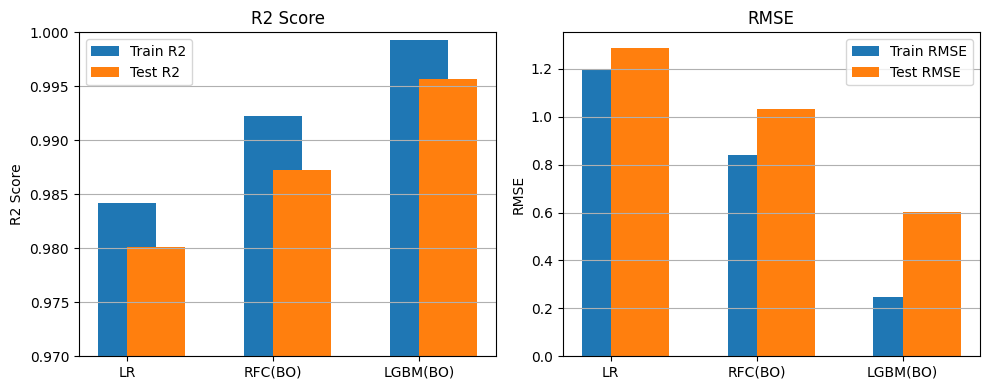

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df_c = pd.DataFrame({
    'model': ['LR', 'RFC(BO)', 'LGBM(BO)'],
    'r2_train': [0.984165, 0.992239, 0.999319],
    'r2_test': [0.980165, 0.987273, 0.995691],
    'RMSE_train': [1.198452, 0.839023, 0.248491],
    'RMSE_test': [1.288137, 1.031828, 0.600393]
})

# R2 시각화
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(df_c['model'], df_c['r2_train'], width=0.4, label='Train R2', align='center')
plt.bar(df_c['model'], df_c['r2_test'], width=0.4, label='Test R2', align='edge')
plt.ylim(0.97, 1.0)
plt.title('R2 Score')
plt.ylabel('R2 Score')
plt.legend()
plt.grid(axis='y')

# RMSE 시각화
plt.subplot(1, 2, 2)
plt.bar(df_c['model'], df_c['RMSE_train'], width=0.4, label='Train RMSE', align='center')
plt.bar(df_c['model'], df_c['RMSE_test'], width=0.4, label='Test RMSE', align='edge')
plt.title('RMSE')
plt.ylabel('RMSE')
plt.legend()
plt.grid(axis='y')


plt.tight_layout()
plt.show()

In [ ]:
#Hyper-parameter tunning 후 전체 모델 성능 비교
df_c.style.background_gradient(cmap='coolwarm', low=1)

#LGBM(BO)가 성능 더 좋음 RMSE에서 둘 다 낮은 성능 보임

,model,r2_train,r2_test,RMSE_train,RMSE_test
0,LR,0.984165,0.980165,1.198452,1.288137
1,RFC(BO),0.992239,0.987273,0.839023,1.031828
2,LGBM(BO),0.999319,0.995691,0.248491,0.600393


In [ ]:
!pip install shap

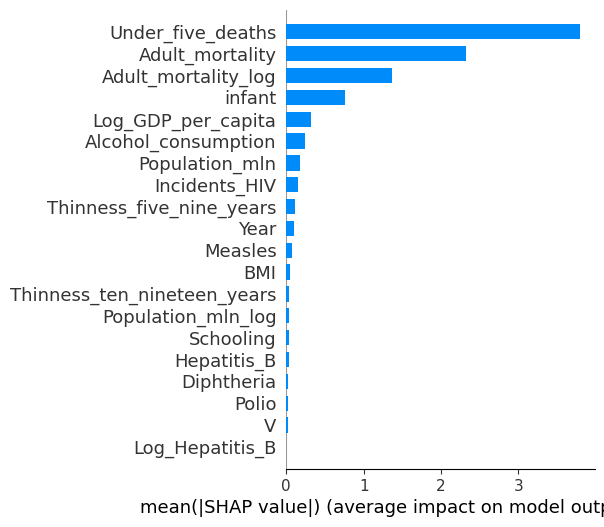

In [ ]:
import shap
plt.style.use(['default'])

shap.initjs()
#  LGBM shap
explainer = shap.TreeExplainer(LGBM)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns, plot_type="bar", show=False)
plt.gcf().set_size_inches(5,5)
plt.show()

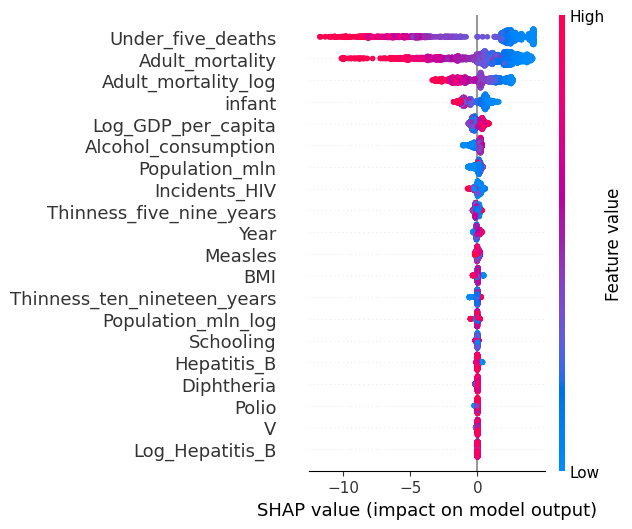

In [ ]:
# LGBM shap
shap.initjs()
shap.summary_plot(shap_values, X_train, show=False)
plt.gcf().set_size_inches(5,5)
plt.show()
# 빨강 값이 높음
# 파랑 값이 작음
# -이면 기대수명 낮아짐
# +이면 기대수명 높인다
#five 기대수명 낮아짐

 98%|===================| 850/864 [00:37<00:00]       

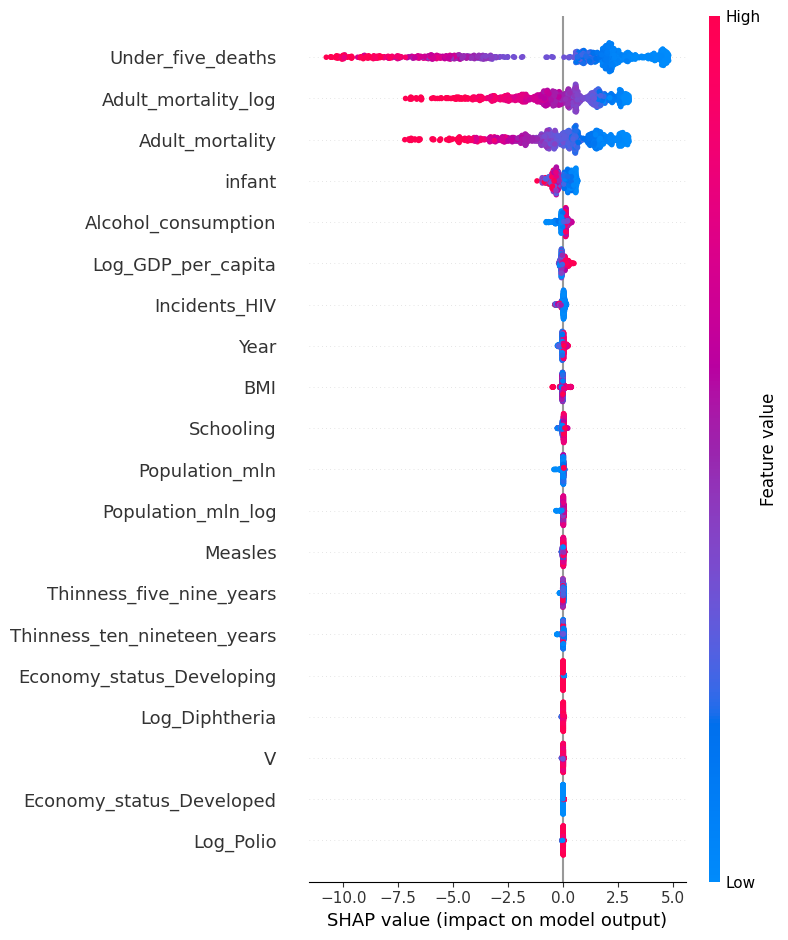

In [ ]:
import shap
shap.initjs()

explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


In [ ]:
X_train.iloc[1,:]

,2673
Year,2014.000000
Under_five_deaths,16.000000
Adult_mortality,0.125326
Alcohol_consumption,3.200000
Hepatitis_B,92.000000
Measles,72.000000
BMI,27.500000
Polio,93.000000
Diphtheria,92.000000
Incidents_HIV,0.500000


가설

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Adult_mortality','infant','Under_five_deaths', 'V', 'Log_GDP_per_capita', 'Schooling', 'Economy_status_Developed', 'Economy_status_Developing', 'Alcohol_consumption']]
Y = df['Life_expectancy']

X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
# X_train과 Y_train 훈련에 사용될 데이터 2016개
# X_test과 Y_test 훈련에 사용할 데이터 864개

(2016, 9)
(864, 9)
(2016,)
(864,)


In [ ]:
print(X.columns)

Index(['Adult_mortality', 'infant', 'Under_five_deaths', 'V',
       'Log_GDP_per_capita', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Alcohol_consumption'],
      dtype='object')


In [ ]:
print(df.columns)

Index(['Country', 'Region', 'Year', 'Under_five_deaths', 'Adult_mortality',
       'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio',
       'Diphtheria', 'Incidents_HIV', 'Population_mln',
       'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling',
       'Economy_status_Developed', 'Economy_status_Developing',
       'Life_expectancy', 'infant', 'Log_GDP_per_capita', 'BMI_group',
       'Population_mln_log', 'Adult_mortality_log', 'Log_Hepatitis_B',
       'Log_Polio', 'Log_Diphtheria', 'V'],
      dtype='object')


In [ ]:
#  Logistic Regression 표준화 (정규화(0~1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)



In [ ]:
#  Model 학습
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train_sc,Y_train)

LinearRegression()

In [ ]:
from sklearn import metrics

Y_pred_train = LR.predict(X_train_sc)
Y_pred_test = LR.predict(X_test_sc)

print(metrics.r2_score(Y_train, Y_pred_train))
print(metrics.r2_score(Y_test, Y_pred_test))
#Train 97프로 설명
#test 97.5프로 설명
# 설명력 낮음

0.9796847965240567
0.9759435775091113


In [ ]:
#  과적합 문제, Train과 Test set에 성능을 최대한 줄여주는 것이 과적합을 방지
from sklearn.metrics import roc_auc_score

print("[Train]")
print('MAE:', metrics.mean_absolute_error(Y_train, Y_pred_train))
print('MSE:', metrics.mean_squared_error(Y_train, Y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train)))
print('------------------------------------------')
print("[Test]")
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred_test))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test)))

#Train
#MAE :예측값과 실제값의 차이을 절대값으로 평균 1.07년
#MSE: 오차를 제곱해서 평균 1.84
#RMSE: MSE에 루트를 씌운 값 1.35
#과적합 없이 안정적인 성능

[Train]
MAE: 1.0791572612834066
MSE: 1.842715608534527
RMSE: 1.3574666141509806
------------------------------------------
[Test]
MAE: 1.1092515573182278
MSE: 2.012423000202325
RMSE: 1.4185989567888189


In [ ]:
#  여러 Model의 성능 비교 빈 DataFrame 생성
df_comparison = pd.DataFrame(columns = ['model', 'r2_train', 'r2_test', 'RMSE_train', 'RMSE_test'])
df_comparison.columns = ['model', 'r2_train', 'r2_test', 'RMSE_train', 'RMSE_test']
df_comparison

,model,r2_train,r2_test,RMSE_train,RMSE_test


In [ ]:
import sklearn.metrics as metrics

lr_re = pd.DataFrame({ 'model' : ['LR'],
                      'r2_train' :  metrics.r2_score(Y_train,Y_pred_train),
                      'r2_test' : metrics.r2_score(Y_test,Y_pred_test),
                      'RMSE_train' : np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train)),
                      'RMSE_test' : np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test)),}
                    )

df_comparison = pd.concat([df_comparison, lr_re], ignore_index=True)

print(df_comparison)
#R2랑 RMSE가 차이가 큼 모델의 설명력 약함
#r2_train 97.97프로
#r2_test_97.5프로
#RMSE_train 1.35 예측값과 실제값 차이 남
#Rmse_test 1.41 예측값과 실제값 사이 평균 오차
#과적합 없이 잘 작동하는 모델

  model  r2_train   r2_test  RMSE_train  RMSE_test
0    LR  0.979685  0.975944    1.357467   1.418599


<ipython-input-520-da519a814221>:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_comparison = pd.concat([df_comparison, lr_re], ignore_index=True)


<ipython-input-521-947acecbf336>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='r2_test', data=df_comparison, palette='viridis') # viridis 색상 그라데이션
<ipython-input-521-947acecbf336>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='RMSE_test', data=df_comparison, palette='magma') #magma 색상변화


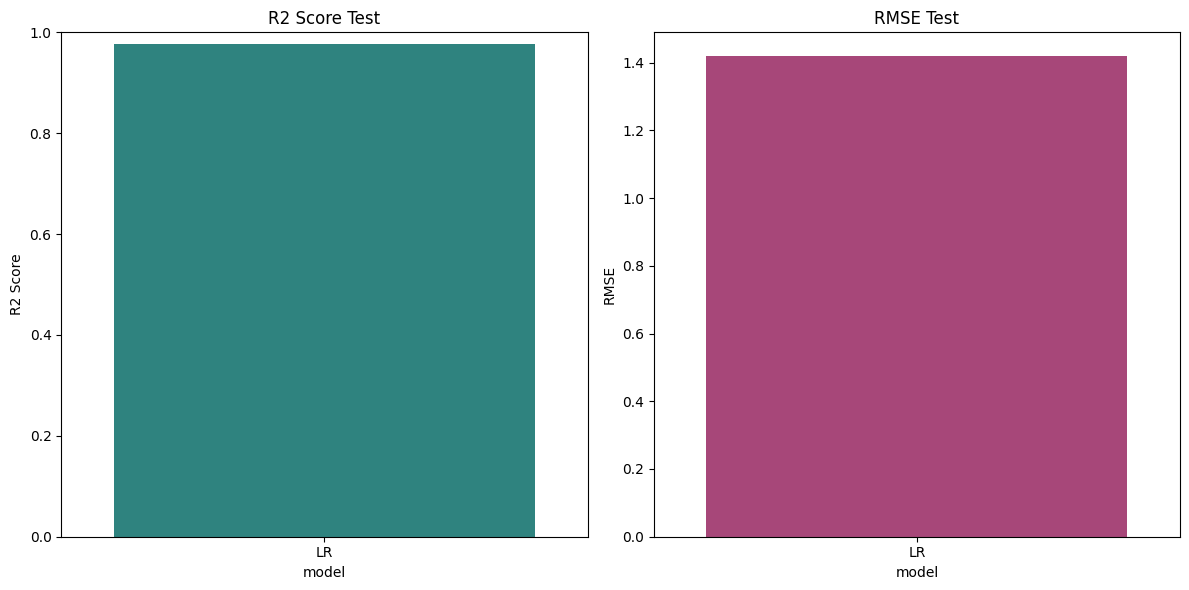

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# R2 score 비교
plt.subplot(1, 2, 1)
sns.barplot(x='model', y='r2_test', data=df_comparison, palette='viridis') # viridis 색상 그라데이션
plt.title('R2 Score Test')
plt.ylim(0, 1)
plt.ylabel('R2 Score')

# RMSE 비교
plt.subplot(1, 2, 2)
sns.barplot(x='model', y='RMSE_test', data=df_comparison, palette='magma') #magma 색상변화
plt.title('RMSE Test')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()
#r2 높을수록 좋음 분산 중 90프로 설명
#RMSE 낮을수록 좋음 기대수명 평균 1.4년 차이  오차

In [ ]:
#  RandomForest
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rfc = RandomForestRegressor()
rfc.fit(X_train, Y_train)

Y_pred_train = rfc.predict(X_train)
Y_pred_test = rfc.predict(X_test)

print(metrics.r2_score(Y_train, Y_pred_train))
print(metrics.r2_score(Y_test, Y_pred_test))
# 성능 좋음

0.999190427452302
0.9929035414580547


In [ ]:
print(X_train.shape)  # (2016, 7)
print(Y_train.shape)  # (2016,)

(2016, 9)
(2016,)


<ipython-input-524-27f003627bd3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Train', 'Test'], y=[rf_result['r2_train'][0], rf_result['r2_test'][0]], palette='coolwarm')


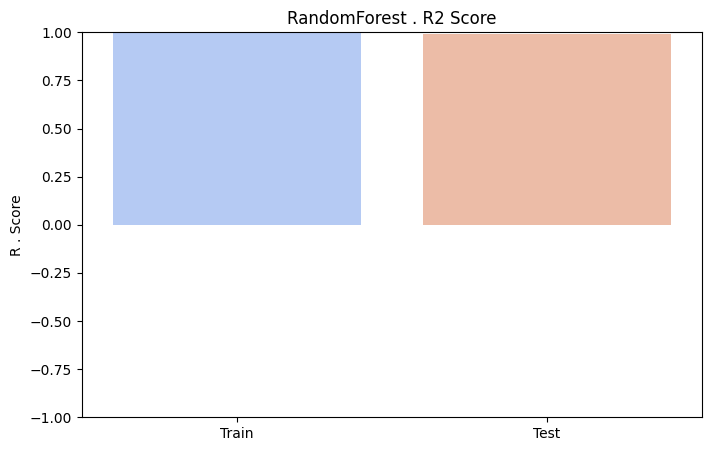

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

rf_result = pd.DataFrame({
    'model': ['RandomForest'],
    'r2_train': [metrics.r2_score(Y_train, Y_pred_train)],
    'r2_test': [metrics.r2_score(Y_test, Y_pred_test)]
})

plt.figure(figsize=(8, 5))

# R2 Score 시각화
sns.barplot(x=['Train', 'Test'], y=[rf_result['r2_train'][0], rf_result['r2_test'][0]], palette='coolwarm')
plt.ylim(-1, 1)
plt.title('RandomForest . R2 Score')
plt.ylabel('R . Score')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
print("[Train]")
print('MAE:', metrics.mean_absolute_error(Y_train, Y_pred_train))
print('MSE:', metrics.mean_squared_error(Y_train, Y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train)))
print('------------------------------------------')
print("[Test]")
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred_test))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test)))
#Train
#MAE: 실제값과 예측값 차이 절대값으로 평균한 값 0.19년
#MSE: 오차 제곱 평균 0.07 낮을수록 예측 성능 좋음
#RMSE: 0.27년 차이

#Test
#MAE: 0.53년 차이 1년 정도 차이 예측 정확도 떨어짐
#MSE: 0.6 예측값과 실제값 차이 제곱하여 평균 낸 값
#RMSE: 0.77년
#성능 괜찮은 편

[Train]
MAE: 0.19589236111111322
MSE: 0.07343327728174717
RMSE: 0.27098575106774003
------------------------------------------
[Test]
MAE: 0.524585648148149
MSE: 0.5936492175925941
RMSE: 0.7704863513343985


In [ ]:
#  BayesianOptimization 설치
!pip install bayesian-optimization

In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

def model_e(n_estimators, maxDepth):
    model = RandomForestRegressor(
        n_estimators=int(n_estimators),
        max_depth=int(maxDepth),
        random_state=1121
    )
    score = cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')
    return np.mean(score)

optimizer = BayesianOptimization(
    f=model_e,
    pbounds={'n_estimators': (100, 300), 'maxDepth': (2, 6)},
    random_state=1121
)

optimizer.maximize(init_points=5, n_iter=10)

print(optimizer.max)
#베이지안 최적화로 Random Forest 성능을 최적화
#(과적합, 과소적합 방지,)

|   iter    |  target   | maxDepth  | n_esti... |
-------------------------------------------------
| 1         | 0.9475    | 3.886     | 209.5     |
| 2         | 0.9728    | 4.081     | 114.0     |
| 3         | 0.8967    | 2.042     | 154.1     |
| 4         | 0.9476    | 3.629     | 248.6     |
| 5         | 0.9823    | 5.849     | 261.0     |
| 6         | 0.9823    | 5.232     | 260.8     |
| 7         | 0.8962    | 2.139     | 279.1     |
| 8         | 0.9822    | 5.05      | 100.1     |
| 9         | 0.9822    | 5.798     | 186.8     |
| 10        | 0.8964    | 2.192     | 176.9     |
| 11        | 0.9822    | 5.972     | 194.6     |
| 12        | 0.9822    | 5.996     | 127.7     |
| 13        | 0.9823    | 5.91      | 228.5     |
| 14        | 0.9823    | 5.791     | 299.9     |
| 15        | 0.8966    | 2.131     | 135.6     |
{'target': np.float64(0.9822970872730853), 'params': {'maxDepth': np.float64(5.232380083744555), 'n_estimators': np.float64(260.79465518611966)}}


In [ ]:
#  RandomForest
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score

r = RandomForestRegressor(n_estimators=261, max_depth = 6, random_state= 1121)
r.fit(X_train, Y_train)

Y_pred_train = r.predict(X_train)
Y_pred_test = r.predict(X_test)


rfc = pd.DataFrame({ 'model' : ['RFC(BO)'],
                      'r2_train' :  metrics.r2_score(Y_train,Y_pred_train),
                      'r2_test' : metrics.r2_score(Y_test,Y_pred_test),
                      'RMSE_train' : np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train)),
                      'RMSE_test' : np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test)),}
                    )

df_comparison = pd.concat([df_comparison, rfc], ignore_index=True)
df_comparison.reset_index(drop=True, inplace = True)
#다른 모델들과 성능을 비교, 분석

In [ ]:
df_comparison

,model,r2_train,r2_test,RMSE_train,RMSE_test
0,LR,0.979685,0.975944,1.357467,1.418599
1,RFC(BO),0.990682,0.985479,0.919361,1.102152
2,RFC(BO),0.990675,0.985478,0.919685,1.102208


<ipython-input-531-57439cdd70d0>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='r2_test', data=df_comparison, palette='Blues_d')
<ipython-input-531-57439cdd70d0>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='RMSE_test', data=df_comparison, palette='Reds_d')


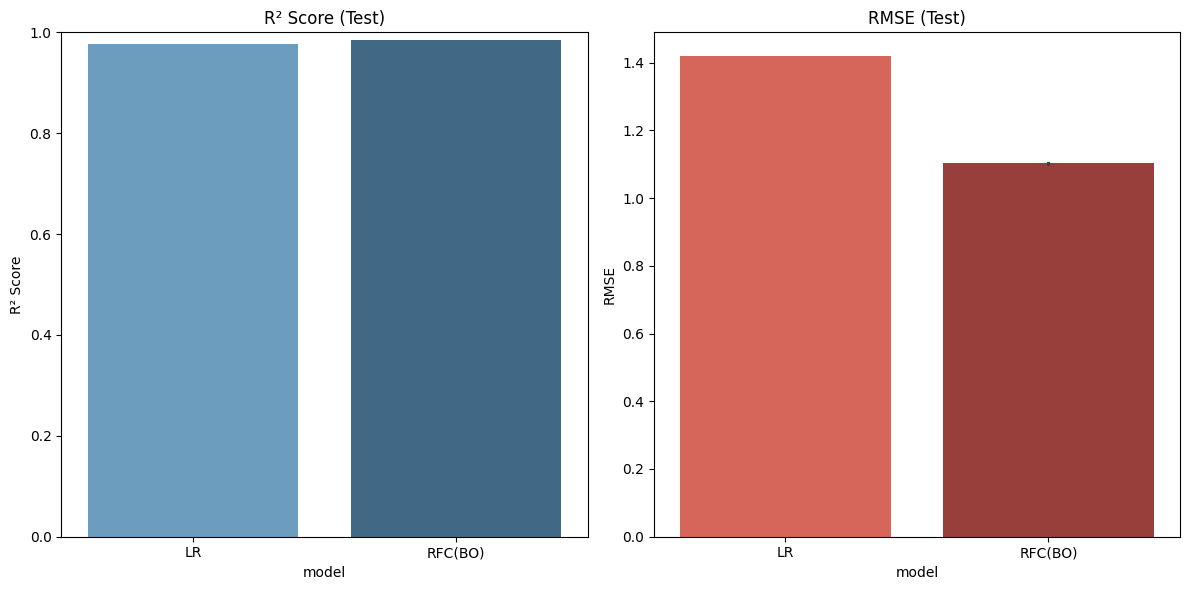

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_comparison = pd.DataFrame({
    'model': ['LR', 'RFC(BO)', 'RFC(BO)'],
    'r2_train': [0.979685, 0.990682, 0.990675],
    'r2_test': [0.975944, 0.985479, 0.985478],
    'RMSE_train': [1.357467, 0.919361, 0.919685],
    'RMSE_test': [1.418599, 1.102152, 1.102208]
})

plt.figure(figsize=(12, 6))

# R2 Score 시각화
plt.subplot(1, 2, 1)
sns.barplot(x='model', y='r2_test', data=df_comparison, palette='Blues_d')
plt.title('R² Score (Test)')
plt.ylim(0, 1)
plt.ylabel('R² Score')

# RMSE 시각화
plt.subplot(1, 2, 2)
sns.barplot(x='model', y='RMSE_test', data=df_comparison, palette='Reds_d')
plt.title('RMSE (Test)')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()
#RFC(BO) (랜덤포레스트 + 베이즈 최적화) 가 더 좋은 성능

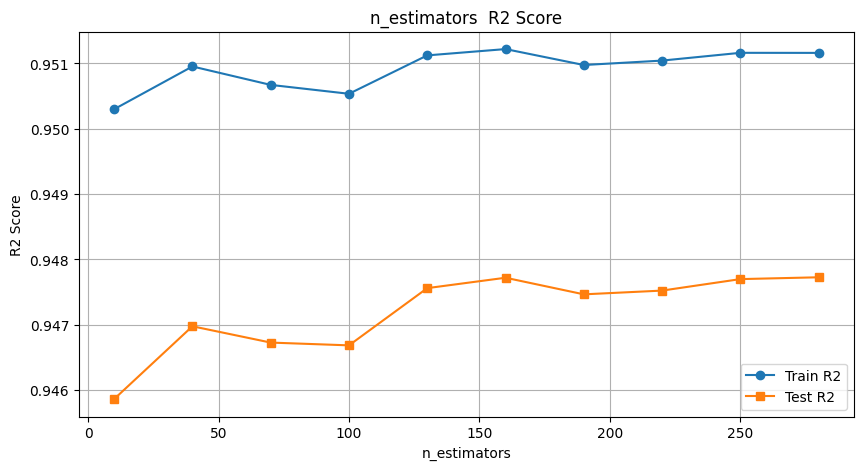

n_estimators =  10 | Train R2 = 0.9503 | Test R2 = 0.9459 | 차이 = 0.0044
n_estimators =  40 | Train R2 = 0.9510 | Test R2 = 0.9470 | 차이 = 0.0040
n_estimators =  70 | Train R2 = 0.9507 | Test R2 = 0.9467 | 차이 = 0.0039
n_estimators = 100 | Train R2 = 0.9505 | Test R2 = 0.9467 | 차이 = 0.0038
n_estimators = 130 | Train R2 = 0.9511 | Test R2 = 0.9476 | 차이 = 0.0036
n_estimators = 160 | Train R2 = 0.9512 | Test R2 = 0.9477 | 차이 = 0.0035
n_estimators = 190 | Train R2 = 0.9510 | Test R2 = 0.9475 | 차이 = 0.0035
n_estimators = 220 | Train R2 = 0.9510 | Test R2 = 0.9475 | 차이 = 0.0035
n_estimators = 250 | Train R2 = 0.9512 | Test R2 = 0.9477 | 차이 = 0.0035
n_estimators = 280 | Train R2 = 0.9512 | Test R2 = 0.9477 | 차이 = 0.0034


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

n_values = range(10, 301, 30)

r2_train_scores = []
r2_test_scores = []

for n in n_values:
    model = RandomForestRegressor(n_estimators=n, max_depth=3, random_state=1121)
    model.fit(X_train, Y_train)

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    r2_train_scores.append(r2_score(Y_train, pred_train))
    r2_test_scores.append(r2_score(Y_test, pred_test))

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(n_values, r2_train_scores, label='Train R2', marker='o')
plt.plot(n_values, r2_test_scores, label='Test R2', marker='s')
plt.title('n_estimators  R2 Score')
plt.xlabel('n_estimators')
plt.ylabel('R2 Score')
plt.legend()
plt.grid(True)
plt.show()
# 결과를 숫자로 보기 좋게 출력
for n, train_r2, test_r2 in zip(n_values, r2_train_scores, r2_test_scores):
    print(f"n_estimators = {n:>3} | Train R2 = {train_r2:.4f} | Test R2 = {test_r2:.4f} | 차이 = {abs(train_r2 - test_r2):.4f}")

# 280이 가장 좋은 모델

LightGBM

In [ ]:
# lightGBM
import lightgbm as lgbm
from lightgbm import LGBMRegressor

LGBM = lgbm.LGBMRegressor()
LGBM.fit(X_train, Y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1652
[LightGBM] [Info] Number of data points in the train set: 2016, number of used features: 9
[LightGBM] [Info] Start training from score 68.878621


LGBMRegressor()

In [ ]:
Y_pred_train = LGBM.predict(X_train)
Y_pred_test = LGBM.predict(X_test)

print(metrics.r2_score(Y_train, Y_pred_train))
print(metrics.r2_score(Y_test, Y_pred_test))
# 모델성능 좋음

0.9983068095220484
0.9924094123186118


In [ ]:
print("[Train]")
print('MAE:', metrics.mean_absolute_error(Y_train, Y_pred_train))
print('MSE:', metrics.mean_squared_error(Y_train, Y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train)))
print('------------------------------------------')
print("[Test]")
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred_test))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test)))
#Train
# MAE: 예측된 값과 실제 값 간의 평균 차이가 약 0.28년
# MSE: 예측 값과 실제 값 간의 차이를 제곱한 후 평균한 값 0.15
# RMSE: 예측 오차의 평균 크기 예측 값과 실제 값 간의 평균적인 오차 크기 0.37년

#Test:
# MAE: 0.56년
# MSE: 0.63 훈련데이터보다 큼 예측 정확도가 더 떨어짐
# RMSE: 0.79년 더 큼
# 훈련데이터 비해 테스트 데이터 일반화 성능 떨어짐

[Train]
MAE: 0.2879690918452756
MSE: 0.1535829323904182
RMSE: 0.3918965837952893
------------------------------------------
[Test]
MAE: 0.5649311474401014
MSE: 0.6349852410874272
RMSE: 0.79685961190628


In [ ]:
# 베이지안 최적화
def lgb_ev(learning_rate, n_estimators, maxDepth):
    clf = LGBMRegressor(
        learning_rate= float(learning_rate),
        n_estimators= int(n_estimators),
        max_depth= int(maxDepth))
    scores = cross_val_score(clf, X_train, Y_train, cv=5, scoring='r2')
    return np.mean(scores)

def bayesOpt(train_X, train_Y):
    lgbBO = BayesianOptimization(lgb_ev, {'learning_rate': (0.005, 0.05),
                                                'n_estimators': (100, 400),
                                                'maxDepth': (2, 6)
                                               })
    lgbBO.maximize(init_points=5, n_iter=15)
    print(lgbBO.res)

bayesOpt(X_train, Y_train)
#LightGBM 모델이 훈련 데이터의 분산을 약 99.2프로 설명

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
| 17        | 0.9881    | 0.03618   | 3.912     | 322.1     |
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1646
[LightGBM] [Info] Number of data points in the train set: 1612, number of used features: 9
[LightGBM] [Info] Start training from score 69.022395
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

In [ ]:
#  lightGBM
from lightgbm import LGBMRegressor

LGBM = LGBMRegressor(learning_rate=0.02149, n_estimators=337, max_depth=6, random_state=1234)
LGBM.fit(X_train, Y_train)


y_pred_train = LGBM.predict(X_train)
y_pred_test = LGBM.predict(X_test)

lgbm_a= pd.DataFrame({ 'model' : ['LGBM(BO)3'],
                      'r2_train' :  metrics.r2_score(Y_train,Y_pred_train),
                      'r2_test' : metrics.r2_score(Y_test,Y_pred_test),
                      'RMSE_train' : np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train)),
                      'RMSE_test' : np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test)),}
                    )
# lgbm_a
df_comparison = pd.concat([df_comparison, lgbm_a], ignore_index=True)
df_comparison.reset_index(drop=True, inplace = True)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1652
[LightGBM] [Info] Number of data points in the train set: 2016, number of used features: 9
[LightGBM] [Info] Start training from score 68.878621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [ ]:
df_comparison
#LightGBM + 베이지안 최적화(LGBM(BO)3) 모델이 가장 뛰어남
#r2_test 가장 높음, RMSE_test 가장 오차 적음

,model,r2_train,r2_test,RMSE_train,RMSE_test
0,LR,0.979685,0.975944,1.357467,1.418599
1,RFC(BO),0.990682,0.985479,0.919361,1.102152
2,RFC(BO),0.990675,0.985478,0.919685,1.102208
3,LGBM(BO)3,0.998307,0.992409,0.391897,0.796860


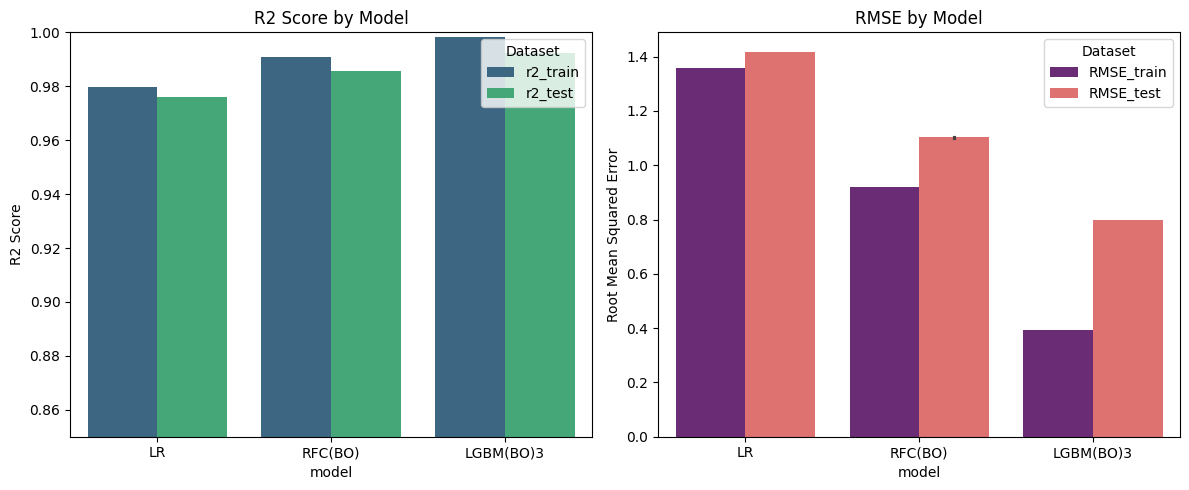

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'model': ['LR', 'RFC(BO)', 'RFC(BO)', 'LGBM(BO)3'],
    'r2_train': [0.979685, 0.990682, 0.990675, 0.998307],
    'r2_test': [0.975944, 0.985479, 0.985478, 0.992409],
    'RMSE_train': [1.357467, 0.919361, 0.919685, 0.391897],
    'RMSE_test': [1.418599, 1.102152, 1.102208, 0.796860]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 5))

# R2 Score
plt.subplot(1, 2, 1)
df_r2 = df.melt(id_vars='model', value_vars=['r2_train', 'r2_test'],
                var_name='Dataset', value_name='R2 Score')
sns.barplot(data=df_r2, x='model', y='R2 Score', hue='Dataset', palette='viridis')
plt.ylim(0.85, 1.0)
plt.title('R2 Score by Model')
plt.ylabel('R2 Score')

# RMSE
plt.subplot(1, 2, 2)
df_rmse = df.melt(id_vars='model', value_vars=['RMSE_train', 'RMSE_test'],
                  var_name='Dataset', value_name='RMSE')
sns.barplot(data=df_rmse, x='model', y='RMSE', hue='Dataset', palette='magma')
plt.title('RMSE by Model')
plt.ylabel('Root Mean Squared Error')

plt.tight_layout()
plt.show()
#R2 LGBM(BO)가 가장 높음
#RMSE LGBM(BO)가 가장 좋음

모델 성능 평가

In [ ]:
#Hyper-parameter tunning 후 전체 모델 성능 비교
df_comparison.style.background_gradient(cmap='coolwarm', low=1)
#R2가 가장 높고, RMSE도 가장 낮아
#LGBM(BO)3 이 가장 좋은 모델


,model,r2_train,r2_test,RMSE_train,RMSE_test
0,LR,0.979685,0.975944,1.357467,1.418599
1,RFC(BO),0.990682,0.985479,0.919361,1.102152
2,RFC(BO),0.990675,0.985478,0.919685,1.102208
3,LGBM(BO)3,0.998307,0.992409,0.391897,0.796860


모델 해석

In [ ]:
!pip install shap

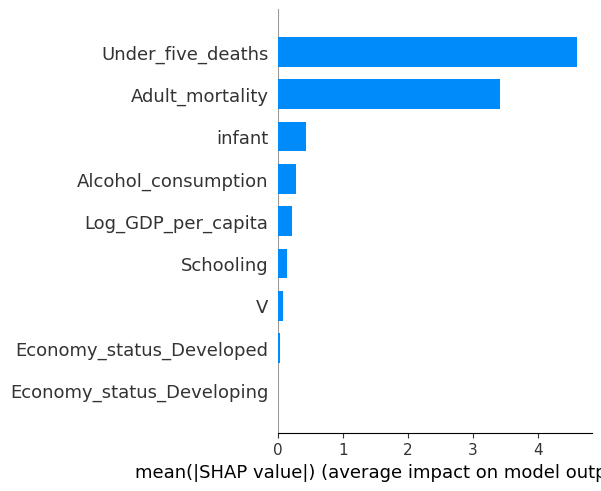

In [ ]:
import shap
plt.style.use(['default'])

shap.initjs()
#  LGBM shap
explainer = shap.TreeExplainer(LGBM)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns, plot_type="bar", show=False)
plt.gcf().set_size_inches(5,5)
plt.show()

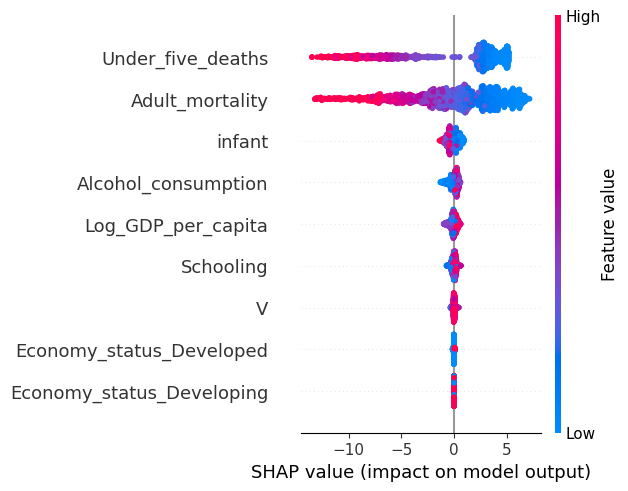

In [ ]:
# LGBM shap
shap.initjs()
shap.summary_plot(shap_values, X_train, show=False)
plt.gcf().set_size_inches(5,5)
plt.show()
#SHAP summary plot으로 feature 기여도와 중요도를 시각적으로 파악해 모델 해석을 향상

 92%|==================  | 798/864 [00:12<00:00]       

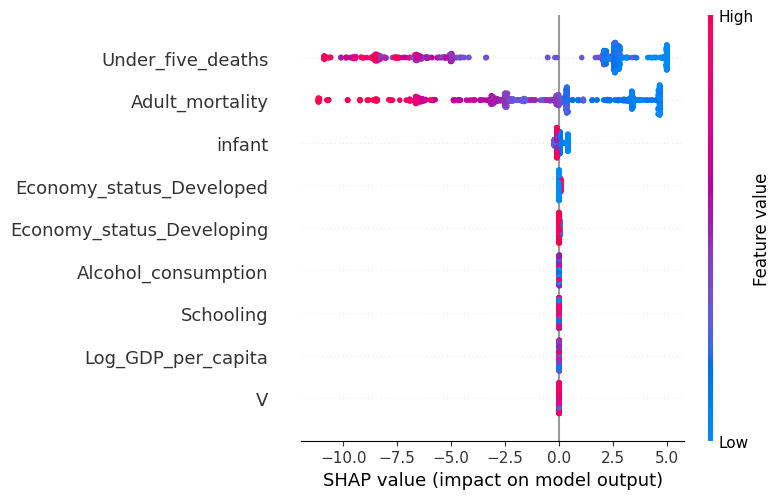

In [ ]:
import shap
shap.initjs()

explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


모델링

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/final/Life-Expectancy-Data-Updated_수정11.csv')

In [ ]:
df1['Log_Hepatitis_B'] = np.log1p(df1['Hepatitis_B'])
df1['Log_Polio'] = np.log1p(df1['Polio'])
df1['Log_Diphtheria'] = np.log1p(df1['Diphtheria'])
df1['Log_Hepatitis_B'] = df1['Log_Hepatitis_B'].fillna(df1['Log_Hepatitis_B'].mean())
df1['Log_Polio'] = df1['Log_Polio'].fillna(df1['Log_Polio'].mean())
df1['Log_Diphtheria'] = df1['Log_Diphtheria'].fillna(df1['Log_Diphtheria'].mean())
#에방접종 Hepatitis_B, Polio, Diphtheria
df1['V'] = df1[['Log_Hepatitis_B', 'Log_Polio', 'Log_Diphtheria']].mean(axis=1)


In [ ]:
from sklearn.model_selection import train_test_split

X = df1.select_dtypes(include=['int64', 'float64']).drop(columns='Life_expectancy')
y = df1['Life_expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train), len(y_train))

2304 2304


In [ ]:
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror'),
}

In [ ]:
# GridSearchCV를 사용한 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)
#트리 최대 깊이 8
#트리 개수 100
#모델의 성능을 최적화, 최적의 하이퍼파라미터 조합 찾기

Best Parameters: {'max_depth': 8, 'n_estimators': 100}
Best R2 Score: 0.9926117183102029


In [ ]:
# Stacking 모델 (메타 모델: 랜덤포레스트)
stacking_model = StackingRegressor(
    estimators=[
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('ada', AdaBoostRegressor(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
        ('xgb', XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')),
    ],
    final_estimator=RandomForestRegressor(n_estimators=100, random_state=42)
)
#서로 다른 알고리즘의 강점을 결합하여 더 강력한 모델 생성
#예측 정확도 향상, 과적합 감소 기대

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', stacking_model)
])

In [ ]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [ ]:
# 모델 평가
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Stacking Model - R2 Score: {r2:.4f}, RMSE: {rmse:.4f}")

Stacking Model - R2 Score: 0.9967, RMSE: 0.5471


In [ ]:
# Permutation Importance (특성 중요도 분석)
perm_importance = permutation_importance(pipeline, X_test, y_test, scoring='r2')
sorted_idx = perm_importance.importances_mean.argsort()

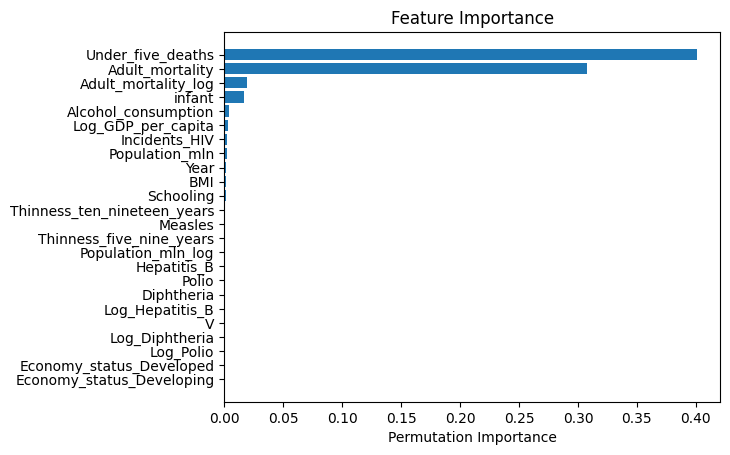

In [ ]:
#특성 중요도 그래프
plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")
plt.show()

In [ ]:
!pip install plotly geopandas

In [ ]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[name] = {"R2 Score": r2, "RMSE": rmse}

results_df = pd.DataFrame(results).T
print(results_df)
#XGBoost 0.996988  0.521143가 가장 높은 설명력과 가장 낮은 오차 - 성능 최우수

                  R2 Score      RMSE
RandomForest      0.996048  0.597010
AdaBoost          0.979797  1.349795
GradientBoosting  0.990208  0.939729
XGBoost           0.996893  0.529337


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/final/Life-Expectancy-Data-Updated_수정11.csv')

In [ ]:
df2['Log_Hepatitis_B'] = np.log1p(df2['Hepatitis_B'])
df2['Log_Polio'] = np.log1p(df2['Polio'])
df2['Log_Diphtheria'] = np.log1p(df2['Diphtheria'])
df2['Log_Hepatitis_B'] = df2['Log_Hepatitis_B'].fillna(df2['Log_Hepatitis_B'].mean())
df2['Log_Polio'] = df2['Log_Polio'].fillna(df2['Log_Polio'].mean())
df2['Log_Diphtheria'] = df2['Log_Diphtheria'].fillna(df2['Log_Diphtheria'].mean())
#에방접종 Hepatitis_B, Polio, Diphtheria
df2['V'] = df2[['Log_Hepatitis_B', 'Log_Polio', 'Log_Diphtheria']].mean(axis=1)


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd


# 사망률 관련 컬럼 제거
drop_cols = ['infant', 'Under_five_deaths', 'Adult_mortality','Adult_mortality_log']
X_train_reduced = X_train.drop(columns=drop_cols)
X_test_reduced = X_test.drop(columns=drop_cols)

# 모델 훈련
model = LGBMRegressor(random_state=1234)
model.fit(X_train_reduced, y_train)

y_pred_train = model.predict(X_train_reduced)
y_pred_test = model.predict(X_test_reduced)

print("[Train]")
print('R2:', r2_score(y_train, y_pred_train))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('------------------------------')
print("[Test]")
print('R2:', r2_score(y_test, y_pred_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2574
[LightGBM] [Info] Number of data points in the train set: 2304, number of used features: 20
[LightGBM] [Info] Start training from score 68.998828
[Train]
R2: 0.9972321168294982
RMSE: 0.49398541080739455
------------------------------
[Test]
R2: 0.9860059552870163
RMSE: 1.123396783280583


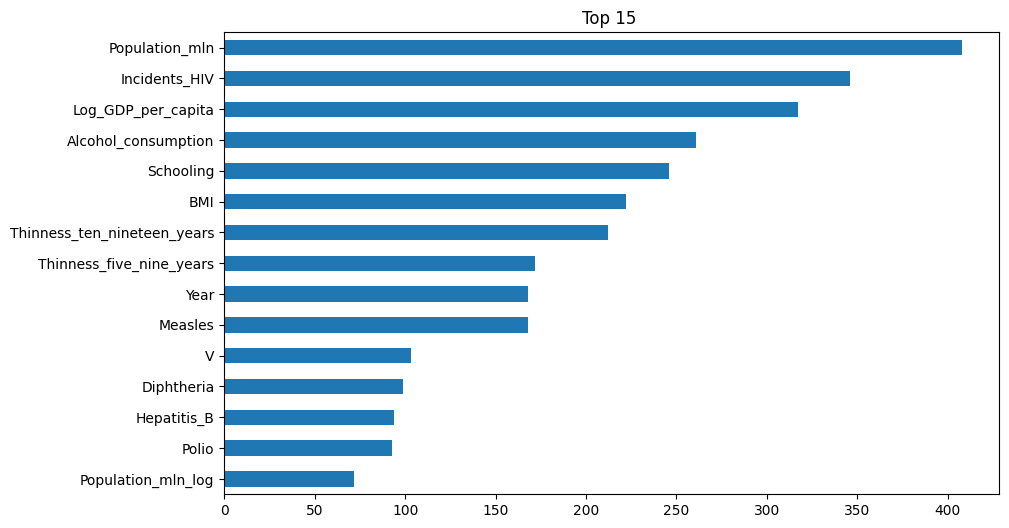

In [ ]:
import matplotlib.pyplot as plt

feature_importance = pd.Series(model.feature_importances_, index=X_train_reduced.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10,6))
feature_importance.head(15).plot(kind='barh')
plt.title('Top 15 ')
plt.gca().invert_yaxis()
plt.show()

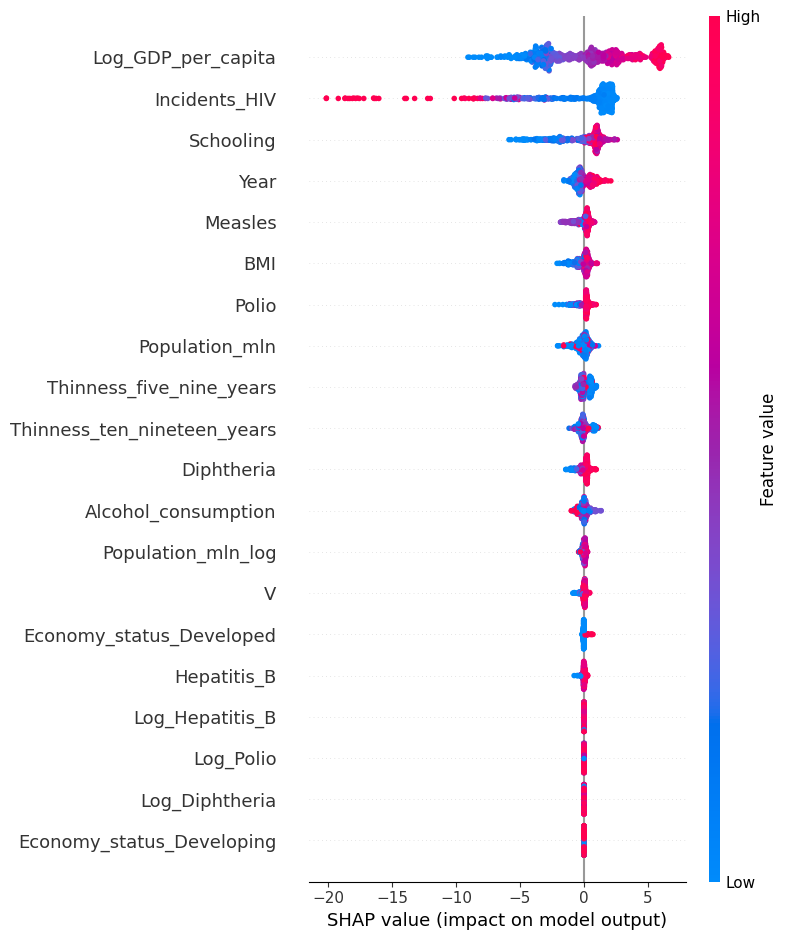

In [ ]:
import shap

explainer = shap.Explainer(model, X_train_reduced)
shap_values = explainer(X_test_reduced)

# 요약 시각화
shap.summary_plot(shap_values, X_test_reduced)

In [ ]:
df_numeric = df2.select_dtypes(include=['int64', 'float64'])
# 사망률 관련 컬럼
mortality = ['infant', 'Under_five_deaths', 'Adult_mortality','Adult_mortality_log']

# 전체 feature에서 일부 제외
feat = df2.columns.drop(['Country', 'Region', 'Year', 'Life_expectancy'])

# 사망률 컬럼 제외
feat_without_mortality = feat.drop(mortality)

# 사망률 포함/제외한 feature
X_with = df2[feat].select_dtypes(include=['int64', 'float64'])
X_without = df2[feat_without_mortality].select_dtypes(include=['int64', 'float64'])

# 확인
print(f"X_with columns: {X_with.columns}")
print(f"X_without columns: {X_without.columns}")

X_with columns: Index(['Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption',
       'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'infant', 'Log_GDP_per_capita',
       'Population_mln_log', 'Adult_mortality_log', 'Log_Hepatitis_B',
       'Log_Polio', 'Log_Diphtheria', 'V'],
      dtype='object')
X_without columns: Index(['Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio',
       'Diphtheria', 'Incidents_HIV', 'Population_mln',
       'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling',
       'Economy_status_Developed', 'Economy_status_Developing',
       'Log_GDP_per_capita', 'Population_mln_log', 'Log_Hepatitis_B',
       'Log_Polio', 'Log_Diphtheria', 'V'],
      dtype='object')


In [ ]:
print(df2.columns)


Index(['Country', 'Region', 'Year', 'Under_five_deaths', 'Adult_mortality',
       'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio',
       'Diphtheria', 'Incidents_HIV', 'Population_mln',
       'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling',
       'Economy_status_Developed', 'Economy_status_Developing',
       'Life_expectancy', 'infant', 'Log_GDP_per_capita', 'BMI_group',
       'Population_mln_log', 'Adult_mortality_log', 'Log_Hepatitis_B',
       'Log_Polio', 'Log_Diphtheria', 'V'],
      dtype='object')


In [ ]:
print(df2.columns)

Index(['Country', 'Region', 'Year', 'Under_five_deaths', 'Adult_mortality',
       'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio',
       'Diphtheria', 'Incidents_HIV', 'Population_mln',
       'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling',
       'Economy_status_Developed', 'Economy_status_Developing',
       'Life_expectancy', 'infant', 'Log_GDP_per_capita', 'BMI_group',
       'Population_mln_log', 'Adult_mortality_log', 'Log_Hepatitis_B',
       'Log_Polio', 'Log_Diphtheria', 'V'],
      dtype='object')


In [ ]:
# 모델
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from lightgbm import LGBMRegressor
import numpy as np

def evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
    model = LGBMRegressor(random_state=1234)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return r2, rmse

# 모델 성능 비교
r2_with, rmse_with = evaluate_model(X_with, y)
r2_without, rmse_without = evaluate_model(X_without, y)

print("사망률 포함")
print(f"R2 Score: {r2_with:.4f}, RMSE: {rmse_with:.4f}")
print("사망률 제외")
print(f"R2 Score: {r2_without:.4f}, RMSE: {rmse_without:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3580
[LightGBM] [Info] Number of data points in the train set: 2304, number of used features: 23
[LightGBM] [Info] Start training from score 68.952865
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2560
[LightGBM] [Info] Number of data points in the train set: 2304, number of used features: 19
[LightGBM] [Info] Start training from score 68.952865
사망률 포함
R2 Score: 0.9962, RMSE: 0.5718
사망률 제외
R2 Score: 0.9854, RMSE: 1.1186


사망률 제외

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
X_without = df2[feat].select_dtypes(include=['int64', 'float64'])

# 사용할 모델들
models = {
    "LightGBM": LGBMRegressor(random_state=1234),
    "Linear": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=1234),
    "Gradient Boosting": GradientBoostingRegressor(random_state=1234),
    "AdaBoost": AdaBoostRegressor(random_state=1234),
    "XGBoost": XGBRegressor(random_state=1234),
}

# 모델 평가
def run_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
    for name, model in models.items():
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        r2 = r2_score(y_test, pred)
        rmse = np.sqrt(mean_squared_error(y_test, pred))
        print(f"{name:18} R2: {r2:.4f}, RMSE: {rmse:.4f}")

    return pd.DataFrame(results)
results_df = run_models(X_without, y)

print("사망률 제외한 모델 비교 결과")



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3580
[LightGBM] [Info] Number of data points in the train set: 2304, number of used features: 23
[LightGBM] [Info] Start training from score 68.952865
LightGBM           R2: 0.9962, RMSE: 0.5718
Linear             R2: 0.9799, RMSE: 1.3123
Random Forest      R2: 0.9965, RMSE: 0.5497
Gradient Boosting  R2: 0.9892, RMSE: 0.9645
AdaBoost           R2: 0.9747, RMSE: 1.4735
XGBoost            R2: 0.9960, RMSE: 0.5824
사망률 제외한 모델 비교 결과


사망률 제외한 모델 비교 결과
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3580
[LightGBM] [Info] Number of data points in the train set: 2304, number of used features: 23
[LightGBM] [Info] Start training from score 68.952865
               Model        R2      RMSE
0           LightGBM  0.996190  0.571809
1             Linear  0.979931  1.312283
2      Random Forest  0.996479  0.549669
3  Gradient Boosting  0.989160  0.964465
4           AdaBoost  0.974697  1.473502
5            XGBoost  0.996048  0.582356


<ipython-input-590-d63e8f9fded3>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df1, x="R2", y="Model", palette="Blues_d")
<ipython-input-590-d63e8f9fded3>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df1, x="RMSE", y="Model", palette="Reds_d")


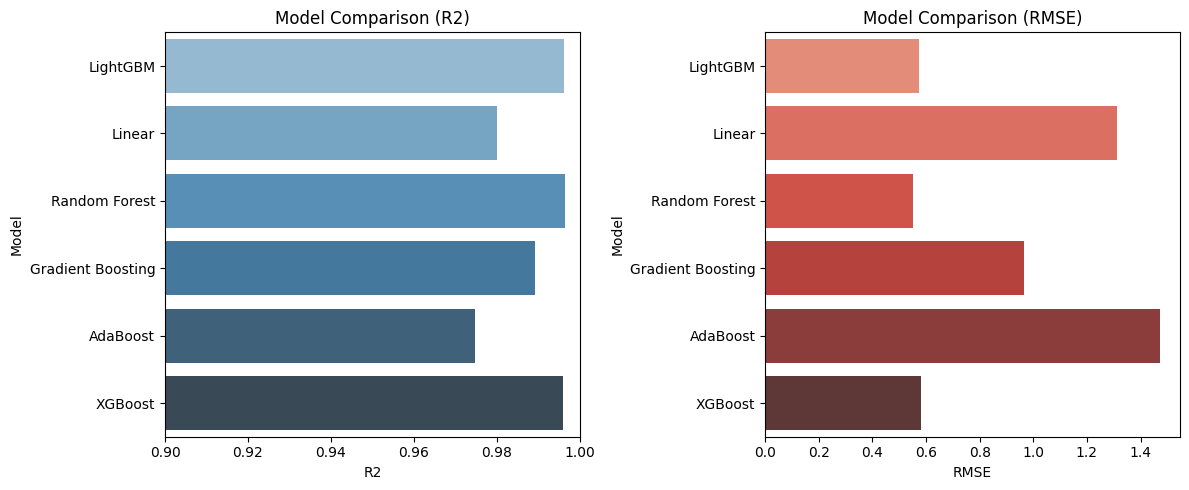

In [ ]:
# 평가 및 저장
def run_models1(X, y):
    results = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

    for name, model in models.items():
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        results.append({
            "Model": name,
            "R2": r2_score(y_test, pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, pred))
        })

    return pd.DataFrame(results)


print("사망률 제외한 모델 비교 결과")
results_df1 = run_models1(X_without, y)
print(results_df1)

# 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=results_df1, x="R2", y="Model", palette="Blues_d")
plt.title("Model Comparison (R2)")
plt.xlim(0.9, 1.0)

plt.subplot(1, 2, 2)
sns.barplot(data=results_df1, x="RMSE", y="Model", palette="Reds_d")
plt.title("Model Comparison (RMSE)")

plt.tight_layout()
plt.show()

In [ ]:
# LightGBM으로 피처 중요도 기반 상위 10개 선택
model = LGBMRegressor(random_state=1234)
model.fit(X_without, y)

importances = pd.Series(model.feature_importances_, index=X_without.columns)
top10 = importances.sort_values(ascending=False).head(10).index

X_selected = X_without[top10]

run_models(X_selected, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3622
[LightGBM] [Info] Number of data points in the train set: 2880, number of used features: 23
[LightGBM] [Info] Start training from score 68.915417
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2176
[LightGBM] [Info] Number of data points in the train set: 2304, number of used features: 10
[LightGBM] [Info] Start training from score 68.952865
LightGBM           R2: 0.9959, RMSE: 0.5932
Linear             R2: 0.9765, RMSE: 1.4195
Random Forest      R2: 0.9965, RMSE: 0.5446
Gradient Boosting  R2: 0.9888, RMSE: 0.9784
AdaBoost           R2: 0.9745, RMSE: 1.4804
XGBoost            R2: 0.9961, RMSE: 0.5804


,RandomForest,AdaBoost,GradientBoosting,XGBoost
R2 Score,0.996048,0.979797,0.990208,0.996893
RMSE,0.597010,1.349795,0.939729,0.529337


사망률 포함

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
X_with = df1[feat].select_dtypes(include=['int64', 'float64'])

# 사용할 모델들
models = {
    "LightGBM": LGBMRegressor(random_state=1234),
    "Linear": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=1234),
    "Gradient Boosting": GradientBoostingRegressor(random_state=1234),
    "AdaBoost": AdaBoostRegressor(random_state=1234),
    "XGBoost": XGBRegressor(random_state=1234),
}

# 모델 평가
def run_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
    for name, model in models.items():
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        r2 = r2_score(y_test, pred)
        rmse = np.sqrt(mean_squared_error(y_test, pred))
        print(f"{name:18} R2: {r2:.4f}, RMSE: {rmse:.4f}")

print("사망률 포함 모델 비교 결과")
run_models(X_with, y)

사망률 포함 모델 비교 결과
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3580
[LightGBM] [Info] Number of data points in the train set: 2304, number of used features: 23
[LightGBM] [Info] Start training from score 68.952865
LightGBM           R2: 0.9962, RMSE: 0.5718
Linear             R2: 0.9799, RMSE: 1.3123
Random Forest      R2: 0.9965, RMSE: 0.5497
Gradient Boosting  R2: 0.9892, RMSE: 0.9645
AdaBoost           R2: 0.9747, RMSE: 1.4735
XGBoost            R2: 0.9960, RMSE: 0.5824


사망률 제외한 모델 비교 결과
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3580
[LightGBM] [Info] Number of data points in the train set: 2304, number of used features: 23
[LightGBM] [Info] Start training from score 68.952865
               Model        R2      RMSE
0           LightGBM  0.996190  0.571809
1             Linear  0.979931  1.312283
2      Random Forest  0.996479  0.549669
3  Gradient Boosting  0.989160  0.964465
4           AdaBoost  0.974697  1.473502
5            XGBoost  0.996048  0.582356


<ipython-input-588-699c6b4d0e77>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="R2", y="Model", palette="Blues_d")
<ipython-input-588-699c6b4d0e77>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="RMSE", y="Model", palette="Reds_d")


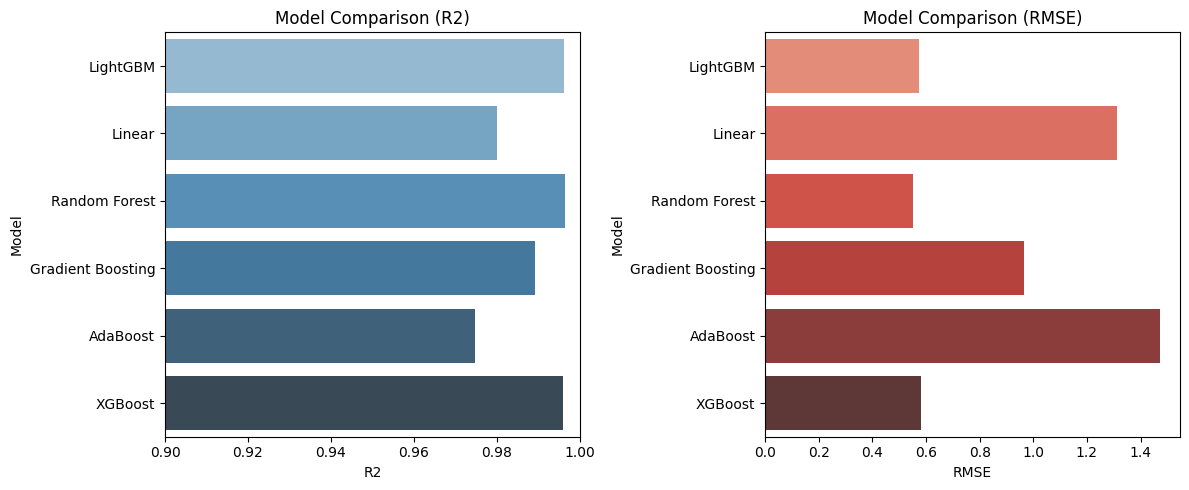

In [ ]:
# 평가 및 저장
def run_models(X, y):
    results = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

    for name, model in models.items():
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        results.append({
            "Model": name,
            "R2": r2_score(y_test, pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, pred))
        })

    return pd.DataFrame(results)


print("사망률 제외한 모델 비교 결과")
results_df = run_models(X_with, y)
print(results_df)

# 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=results_df, x="R2", y="Model", palette="Blues_d")
plt.title("Model Comparison (R2)")
plt.xlim(0.9, 1.0)

plt.subplot(1, 2, 2)
sns.barplot(data=results_df, x="RMSE", y="Model", palette="Reds_d")
plt.title("Model Comparison (RMSE)")

plt.tight_layout()
plt.show()

In [ ]:
# LightGBM으로 피처 중요도 기반 상위 10개 선택
model = LGBMRegressor(random_state=1234)
model.fit(X_with, y)

importances = pd.Series(model.feature_importances_, index=X_with.columns)
top10 = importances.sort_values(ascending=False).head(10).index

X_selected = X_with[top10]

# 이걸로 다시 모델 성능 비교
run_models(X_selected, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3622
[LightGBM] [Info] Number of data points in the train set: 2880, number of used features: 23
[LightGBM] [Info] Start training from score 68.915417
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2176
[LightGBM] [Info] Number of data points in the train set: 2304, number of used features: 10
[LightGBM] [Info] Start training from score 68.952865


,Model,R2,RMSE
0,LightGBM,0.995899,0.593211
1,Linear,0.976518,1.419475
2,Random Forest,0.996543,0.544649
3,Gradient Boosting,0.988845,0.978360
4,AdaBoost,0.974461,1.480352
5,XGBoost,0.996075,0.580350
